In [2]:
# Test utils.py functions
import sys

sys.path.append("01_interpretability")

from utils import extract_attention, plot_attention_heatmap, get_attention_stats
from transformers import EsmModel, EsmTokenizer

In [3]:
# Load model
model = EsmModel.from_pretrained("facebook/esm2_t33_650M_UR50D", output_attentions=True)
tokenizer = EsmTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")
model.eval()

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


EsmModel(
  (embeddings): EsmEmbeddings(
    (word_embeddings): Embedding(33, 1280, padding_idx=1)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): EsmEncoder(
    (layer): ModuleList(
      (0-32): 33 x EsmLayer(
        (attention): EsmAttention(
          (self): EsmSelfAttention(
            (query): Linear(in_features=1280, out_features=1280, bias=True)
            (key): Linear(in_features=1280, out_features=1280, bias=True)
            (value): Linear(in_features=1280, out_features=1280, bias=True)
            (rotary_embeddings): RotaryEmbedding()
          )
          (output): EsmSelfOutput(
            (dense): Linear(in_features=1280, out_features=1280, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (LayerNorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        )
        (intermediate): EsmIntermediate(
          (dense): Linear(in_features=1280, out_features=5120, bias=True)
        )
        (output): EsmOut

In [4]:
# Test extraction
test_seq = "MVHLTPEEKSAVTALWGKVN"
attention = extract_attention(model, tokenizer, test_seq, layer_idx=-1)
print(f"✓ Extracted attention shape: {attention.shape}")

✓ Extracted attention shape: (22, 22)


In [5]:
# Test stats
stats = get_attention_stats(attention)
print(f"✓ Attention stats: mean={stats['mean']:.4f}, max={stats['max']:.4f}")

✓ Attention stats: mean=0.0455, max=0.4742


✓ Saved to outputs/test_utils.png


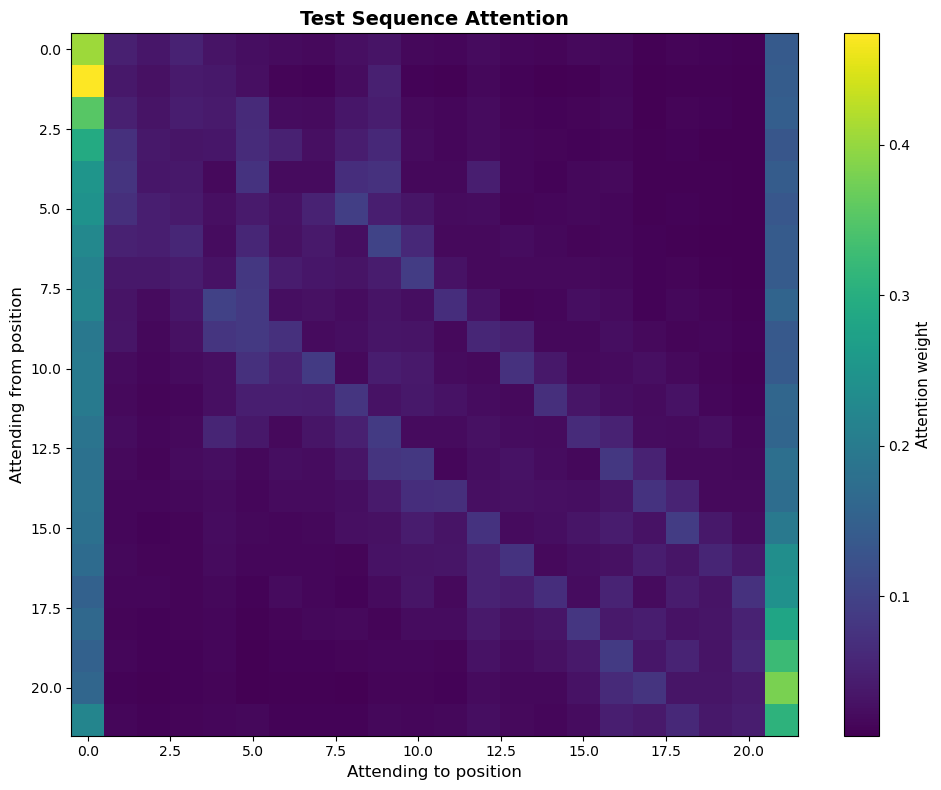

✓ All utils working correctly


In [6]:
# Test plot (should create visualization)
plot_attention_heatmap(
    attention, "Test Sequence Attention", save_path="outputs/test_utils.png"
)
print("✓ All utils working correctly")